# PRML 1.2.5 多項式フィッティングの再訪（ベイズ理論利用）

## 参考
- http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf
- https://qiita.com/koba-jon/items/a4d915ec5cb0f13c8e1e
- https://qiita.com/koba-jon/items/49990d306b53462383c4
- https://tech.preferred.jp/ja/blog/polynomial-fitting/
- https://qiita.com/mashiro135/items/f8cb74b2ccd4e3b3de93
- https://www.youtube.com/watch?v=0HgqFxsO53Q
- https://qiita.com/ctgk/items/555802600638f41b40c5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## とりあえず適当なデータを生成

In [2]:
n = 100
sigma = 0.25
x = np.linspace(0, 1, n)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=sigma, size=n)

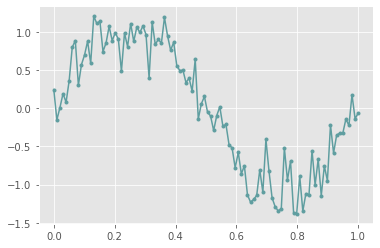

In [3]:
plt.plot(x, y, marker='.',color='cadetblue')

## フィッティングしてみる

In [4]:
def fitting(x, y, m):
    A = np.ndarray((len(x), m))
    for i in range(m):
        A[:, i] = x**i
    w = np.linalg.solve(A.T @ A, A.T @ y.T)
    return w, A

In [5]:
def f(x, w):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(w)):
            y[i] += w[j] * x[i]**j
    return y

In [6]:
def polyfeat(x, m):
    features = [x ** i for i in range(m)]
    return np.array(features).transpose()

def bayes_fitting(X, t, alpha, beta):
    w_var = np.linalg.inv(alpha * np.identity(np.size(X, 1)) + beta * X.T.dot(X))
    w_mean = beta * w_var.dot(X.T.dot(t))
    return w_mean, w_var

def bayes_predict(X, w_mean, w_var, alpha, beta):
    y = X.dot(w_mean)
    y_var = 1 / beta + np.sum(X.dot(w_var) * X, axis=1)
    y_std = np.sqrt(y_var)
    return y, y_std

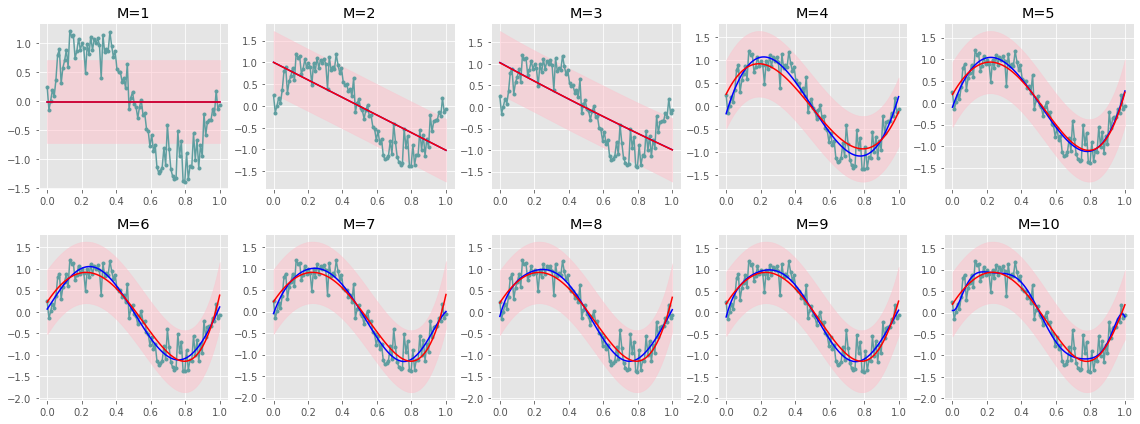

In [7]:
plt.figure(figsize=(16, 6))

alpha = 1e-2
beta=2
    
for m in range(1, 11):
    w, feat = fitting(x, y, m)
    x_est = np.linspace(0, 1, 100)
    y_est = f(x_est, w)
    #bayes
    w_mean, w_var = bayes_fitting(feat, y, alpha, beta)
    feat_test = polyfeat(x_est, m)
    y_bayes, y_std = bayes_predict(feat_test, w_mean, w_var, alpha, beta)
    plt.subplot(2, 5, m)
    plt.title('M={}'.format(m))
    plt.plot(x, y, marker='.', color='cadetblue')
    #plt.scatter(x, y, s=20, marker='o', color='black', alpha=0.75, label="observation")
    plt.plot(x_est, y_est, color='blue', label="poly_est")
    #bayes
    plt.plot(x_est, y_bayes, color='red', label="predict_mean")
    plt.fill_between(x_est, y_bayes - y_std, y_bayes + y_std,
                     color='pink', alpha=0.5, label="predict_std")
plt.tight_layout()
plt.show()

## 正則化項を加えてオーバーフィッティングを防止してみる

In [8]:
def fitting2(x, y, l, m):
    A = np.ndarray((len(x), m))
    for i in range(m):
        A[:, i] = x**i
    w = np.linalg.solve(A.T @ A + l*np.eye(m), A.T @ y.T)
    return w

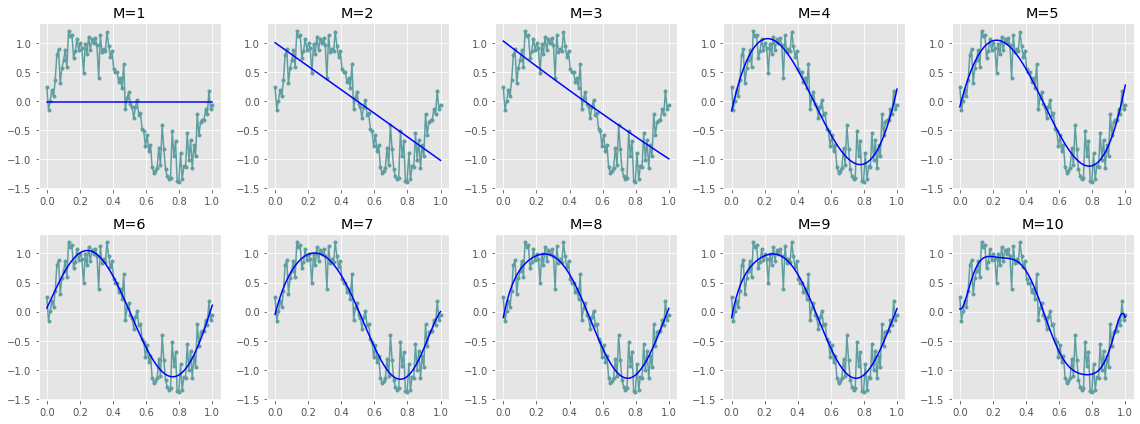

In [9]:
plt.figure(figsize=(16, 6))
for m in range(1, 11):
    w = fitting2(x, y, 0.0000000000001, m)
    x_est = np.linspace(0, 1, 100)
    y_est = f(x_est, w)
    plt.subplot(2, 5, m)
    plt.title('M={}'.format(m))
    plt.plot(x, y, marker='.',color='cadetblue')
    plt.plot(x_est, y_est, color='blue')
plt.tight_layout()
plt.show()